In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

In [35]:
train = pd.read_csv('train.csv').drop(['Name', 'Ticket'], axis=1)
test = pd.read_csv('test.csv').drop(['Name', 'Ticket'], axis=1)
train['date'] = pd.date_range("1998-05-09", periods=len(train), freq="D")

# 可視化

In [46]:
def get_plot(df):
    for col in df.columns:
        print('-'*10)
        print('col name = ' + str(col))
        col_type = df[col].dtypes
        print('col_type = ' + str(col_type))
        
        if col_type == 'object':
            if df[col].nunique() < len(df) * 0.1:
                sns.countplot(df[col])
                plt.show()
            else:
                print('unique = {}'.format(df[col].nunique()))
        elif col_type == 'datetime64[ns]':
            print('min : {}'.format(df[col].min()) + 'max : {}'.format(df[col].max()))
        else:
            if df[col].nunique() > 10:
                sns.distplot(df[col])
                plt.show()
            else:
                sns.countplot(df[col])
                plt.show()

In [47]:
train['Cabin'].nunique()

147

----------
col name = PassengerId
col_type = int64


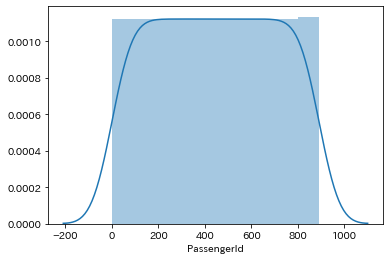

----------
col name = Survived
col_type = int64


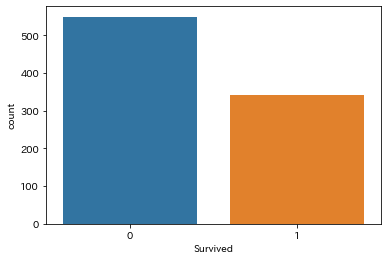

----------
col name = Pclass
col_type = int64


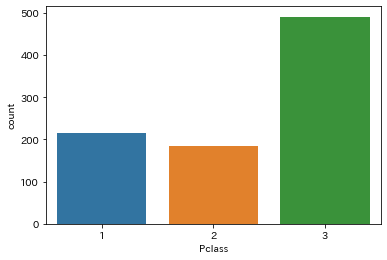

----------
col name = Sex
col_type = object


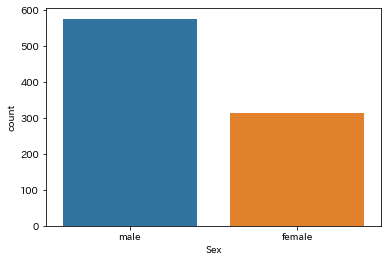

----------
col name = Age
col_type = float64


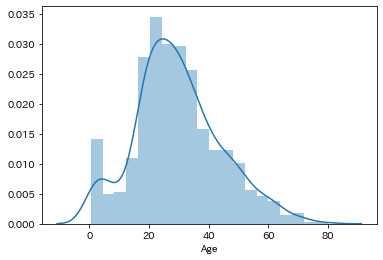

----------
col name = SibSp
col_type = int64


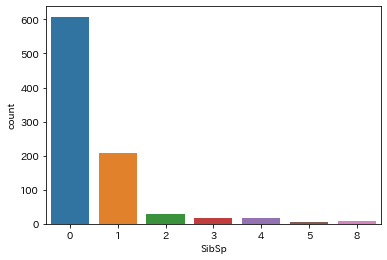

----------
col name = Parch
col_type = int64


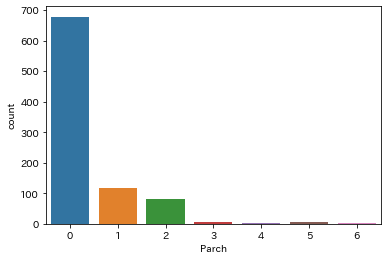

----------
col name = Fare
col_type = float64


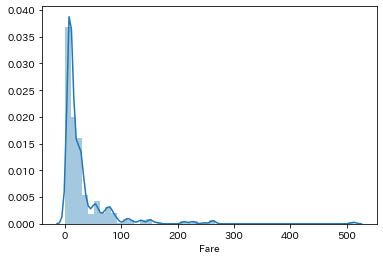

----------
col name = Cabin
col_type = object
unique = 147
----------
col name = Embarked
col_type = object


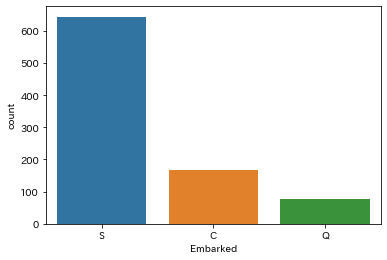

----------
col name = date
col_type = datetime64[ns]
min : 1998-05-09 00:00:00max : 2000-10-15 00:00:00


In [48]:
get_plot(train)

# カテゴリ変数 × 数値変数　の変数作成

In [57]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Cabin          147
Embarked         3
date           891
dtype: int64

In [92]:
def create_features(df):
    cat_cols = [col for col in df.columns if df[col].nunique() < 20]
    num_cols = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes != 'object' and df[col].dtypes != 'datetime64[ns]']
    df_ = df.copy()
    for cat_col in cat_cols:
        for num_col in num_cols:
            group = df.groupby(cat_col)[num_col].agg(['mean', 'std', 'min', 'max']).reset_index().rename(columns={'mean':'mean_'+num_col+'_in_same_'+cat_col, 'std':'std_'+num_col+'_in_same_'+cat_col, 'min':'min_'+num_col+'_in_same_'+cat_col, 'max':'max_'+num_col+'_in_same_'+cat_col})
            df_ = df_.merge(group, on=cat_col, how='left')
            df_['diff_' + num_col + '_from_' + cat_col + '_mean'] = df[num_col] - df_['mean_'+num_col+'_in_same_'+cat_col]
    return df_

In [93]:
create_features(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,mean_Age_in_same_Embarked,std_Age_in_same_Embarked,min_Age_in_same_Embarked,max_Age_in_same_Embarked,diff_Age_from_Embarked_mean,mean_Fare_in_same_Embarked,std_Fare_in_same_Embarked,min_Fare_in_same_Embarked,max_Fare_in_same_Embarked,diff_Fare_from_Embarked_mean
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,...,29.445397,14.143192,0.67,80.0,-7.445397,27.079812,35.887993,0.0000,263.0000,-19.829812
1,2,1,1,female,38.0,1,0,71.2833,C85,C,...,30.814769,15.434860,0.42,71.0,7.185231,59.954144,83.912994,4.0125,512.3292,11.329156
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,...,29.445397,14.143192,0.67,80.0,-3.445397,27.079812,35.887993,0.0000,263.0000,-19.154812
3,4,1,1,female,35.0,1,0,53.1000,C123,S,...,29.445397,14.143192,0.67,80.0,5.554603,27.079812,35.887993,0.0000,263.0000,26.020188
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,...,29.445397,14.143192,0.67,80.0,5.554603,27.079812,35.887993,0.0000,263.0000,-19.029812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S,...,29.445397,14.143192,0.67,80.0,-2.445397,27.079812,35.887993,0.0000,263.0000,-14.079812
887,888,1,1,female,19.0,0,0,30.0000,B42,S,...,29.445397,14.143192,0.67,80.0,-10.445397,27.079812,35.887993,0.0000,263.0000,2.920188
888,889,0,3,female,NaN,1,2,23.4500,NaN,S,...,29.445397,14.143192,0.67,80.0,NaN,27.079812,35.887993,0.0000,263.0000,-3.629812
889,890,1,1,male,26.0,0,0,30.0000,C148,C,...,30.814769,15.434860,0.42,71.0,-4.814769,59.954144,83.912994,4.0125,512.3292,-29.954144


In [ ]:
class Adversarial_validator:

    def __init__(self, train, test, features, categoricals):
        self.train = train
        self.test = test
        self.features = features
        self.categoricals = categoricals
        self.union_df = self.train_test_union(self.train, self.test)
        self.cv = self.get_cv()
        self.models = []
        self.oof_pred = self.fit()
        self.report_plot()

    def fit(self):
        oof_pred = np.zeros((len(self.union_df), ))

        for fold, (train_idx, val_idx) in enumerate(self.cv):
            x_train, x_predict = self.union_df[self.features].iloc[
                train_idx], self.union_df[self.features].iloc[val_idx]
            y_train = self.union_df['target'][train_idx]
            train_set = self.convert_dataset(x_train, y_train)
            model = self.train_model(train_set)
            self.models.append(model)

            oof_pred[val_idx] = model.predict(
                x_predict).reshape(oof_pred[val_idx].shape)
        self.union_df['prediction'] = oof_pred
        return oof_pred

    def train_test_union(self, train, test):
        train['target'] = 0
        test['target'] = 1
        return pd.concat([train, test], axis=0).reset_index(drop=True)

    def get_cv(self):
        cv = StratifiedKFold(n_splits=5,
                             shuffle=True, random_state=42)

        return cv.split(self.union_df, self.union_df['target'])

    def convert_dataset(self, X, y):
        return lgb.Dataset(X, label=y, categorical_feature=self.categoricals)

    def train_model(self, train_set):
        return lgb.train(self.get_params(), train_set)

    def get_params(self):
        param = {'num_leaves': 50,
                 'num_round': 100,
                 'min_data_in_leaf': 30,
                 'objective': 'binary',
                 'max_depth': 5,
                 'learning_rate': 0.2,
                 'min_child_samples': 20,
                 'boosting': 'gbdt',
                 'feature_fraction': 0.9,
                 'bagging_freq': 1,
                 'bagging_fraction': 0.9,
                 'bagging_seed': 44,
                 'verbose_eval': 50,
                 'metric': 'auc',
                 'verbosity': -1}
        return param

    def report_plot(self):
        fig, ax = plt.subplots(figsize=(16, 12))
        plt.subplot(2, 2, 1)
        self.plot_feature_importance()
        plt.subplot(2, 2, 2)
        self.plot_roc_curve()
        plt.subplot(2, 2, 3)
        plt.hist(self.union_df['target'] - self.oof_pred)
        plt.title('Distribution of errors')
        plt.subplot(2, 2, 4)
        plt.hist(np.random.choice(self.oof_pred, 1000, False))
        plt.title('Distribution of oof predictions')

    def get_feature_importance(self):
        n = len(self.models)
        feature_imp_df = pd.DataFrame()
        for i in range(n):
            tmp = pd.DataFrame(zip(self.models[i].feature_importance(
            ), self.features), columns=['Value', 'Feature'])
            tmp['n_models'] = i
            feature_imp_df = pd.concat([feature_imp_df, tmp])
            del tmp
        self.feature_importance = feature_imp_df
        return feature_imp_df

    def plot_feature_importance(self, n=20):
        imp_df = self.get_feature_importance().groupby(
            ['Feature'])[['Value']].mean().reset_index(False)
        imp_top_df = imp_df.sort_values('Value', ascending=False).head(n)
        sns.barplot(data=imp_top_df, x='Value', y='Feature', orient='h')
        plt.title('Feature importances')

    def plot_roc_curve(self):
        fpr, tpr, thresholds = metrics.roc_curve(
            self.union_df['target'], self.oof_pred)
        auc = metrics.auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' % auc)
        plt.legend()
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

adv = Adversarial_validator(train, test, features, categoricals)